In [18]:
from nba_api.stats.endpoints import leaguedashplayerstats, leaguedashteamstats
from nba_api.stats.static import teams as teams_static
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Import succesful")

Import succesful


In [22]:
player_stats = leaguedashplayerstats.LeagueDashPlayerStats(
    season = '2024-25',
    per_mode_detailed = 'PerGame'
)
players_df = player_stats.get_data_frames()[0]

# only key columns
players_clean = players_df[['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID',
                           'GP', 'MIN', 'PTS', 'REB', 'AST','STL', 'BLK',
                           'TOV', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'TEAM_ABBREVIATION']]

print("Player stats loaded:")
print(players_clean.head())
print(f"Shape: {players_clean.shape}")

Player stats loaded:
   PLAYER_ID    PLAYER_NAME     TEAM_ID  GP   MIN   PTS  REB  AST  STL  BLK  \
0    1630639    A.J. Lawson  1610612761  26  18.7   9.1  3.3  1.2  0.5  0.2   
1    1631260       AJ Green  1610612749  73  22.7   7.4  2.4  1.5  0.5  0.1   
2    1642358     AJ Johnson  1610612764  29  22.0   7.6  2.0  2.6  0.4  0.1   
3     203932   Aaron Gordon  1610612743  51  28.4  14.7  4.8  3.2  0.5  0.3   
4    1628988  Aaron Holiday  1610612745  62  12.8   5.5  1.3  1.3  0.3  0.2   

   TOV  FG_PCT  FG3_PCT  FT_PCT TEAM_ABBREVIATION  
0  0.6   0.421    0.327   0.683               TOR  
1  0.5   0.429    0.427   0.815               MIL  
2  1.2   0.385    0.267   0.865               WAS  
3  1.4   0.531    0.436   0.810               DEN  
4  0.6   0.437    0.398   0.829               HOU  
Shape: (569, 15)


In [23]:
team_stats = leaguedashteamstats.LeagueDashTeamStats(season = '2024-25',
                                                     league_id_nullable = '00')
teams_df = team_stats.get_data_frames()[0]

# only key columns
teams_clean = teams_df[['TEAM_ID', 'TEAM_NAME', 'W', 'L', 'W_PCT']]

print("Team stats loaded:")
print(teams_clean.head())
print(f"Shape: {teams_clean.shape}")

Team stats loaded:
      TEAM_ID          TEAM_NAME   W   L  W_PCT
0  1610612737      Atlanta Hawks  40  42  0.488
1  1610612738     Boston Celtics  61  21  0.744
2  1610612751      Brooklyn Nets  26  56  0.317
3  1610612766  Charlotte Hornets  19  63  0.232
4  1610612741      Chicago Bulls  39  43  0.476
Shape: (30, 5)


In [24]:
# merge on team_id
merged_df = players_clean.merge(teams_clean, on = 'TEAM_ID', how = 'left')

print("\nMerged dataset")
print(merged_df.head())
print(f"Shape: {merged_df.shape}")

# check for missing vals
print(f"\nMissing values:\n{merged_df.isnull().sum()}")


Merged dataset
   PLAYER_ID    PLAYER_NAME     TEAM_ID  GP   MIN   PTS  REB  AST  STL  BLK  \
0    1630639    A.J. Lawson  1610612761  26  18.7   9.1  3.3  1.2  0.5  0.2   
1    1631260       AJ Green  1610612749  73  22.7   7.4  2.4  1.5  0.5  0.1   
2    1642358     AJ Johnson  1610612764  29  22.0   7.6  2.0  2.6  0.4  0.1   
3     203932   Aaron Gordon  1610612743  51  28.4  14.7  4.8  3.2  0.5  0.3   
4    1628988  Aaron Holiday  1610612745  62  12.8   5.5  1.3  1.3  0.3  0.2   

   TOV  FG_PCT  FG3_PCT  FT_PCT TEAM_ABBREVIATION           TEAM_NAME   W   L  \
0  0.6   0.421    0.327   0.683               TOR     Toronto Raptors  30  52   
1  0.5   0.429    0.427   0.815               MIL     Milwaukee Bucks  48  34   
2  1.2   0.385    0.267   0.865               WAS  Washington Wizards  18  64   
3  1.4   0.531    0.436   0.810               DEN      Denver Nuggets  50  32   
4  0.6   0.437    0.398   0.829               HOU     Houston Rockets  52  30   

   W_PCT  
0  0.366  


In [33]:
# calc player impact score
merged_df['IMPACT'] = (
    merged_df['PTS'] +
    merged_df['REB'] +
    merged_df['AST'] +
    merged_df['STL'] +
    merged_df['BLK'] -
    merged_df['TOV']
)

# group by team and get top scorer on each 
team_top_players = merged_df.loc[merged_df.groupby('TEAM_ID')['PTS'].idxmax()]

print("\nBest scorer on each team:")
print(team_top_players[['PLAYER_NAME', 'TEAM_NAME', 'PTS', 'W',
                        'L']].to_string(index = False))


Best scorer on each team:
            PLAYER_NAME              TEAM_NAME  PTS  W  L
             Trae Young          Atlanta Hawks 24.2 40 42
           Jayson Tatum         Boston Celtics 26.8 61 21
       Donovan Mitchell    Cleveland Cavaliers 24.0 64 18
        Zion Williamson   New Orleans Pelicans 24.6 21 61
             Coby White          Chicago Bulls 20.4 39 43
          Anthony Davis       Dallas Mavericks 24.7 39 43
           Nikola Jokić         Denver Nuggets 29.6 50 32
          Stephen Curry  Golden State Warriors 24.5 48 34
            Jalen Green        Houston Rockets 21.0 52 30
           James Harden            LA Clippers 22.8 50 32
            Luka Dončić     Los Angeles Lakers 28.2 50 32
            Tyler Herro             Miami Heat 23.9 37 45
  Giannis Antetokounmpo        Milwaukee Bucks 30.4 48 34
        Anthony Edwards Minnesota Timberwolves 27.6 49 33
             Cam Thomas          Brooklyn Nets 24.0 26 56
          Jalen Brunson        New York Knick

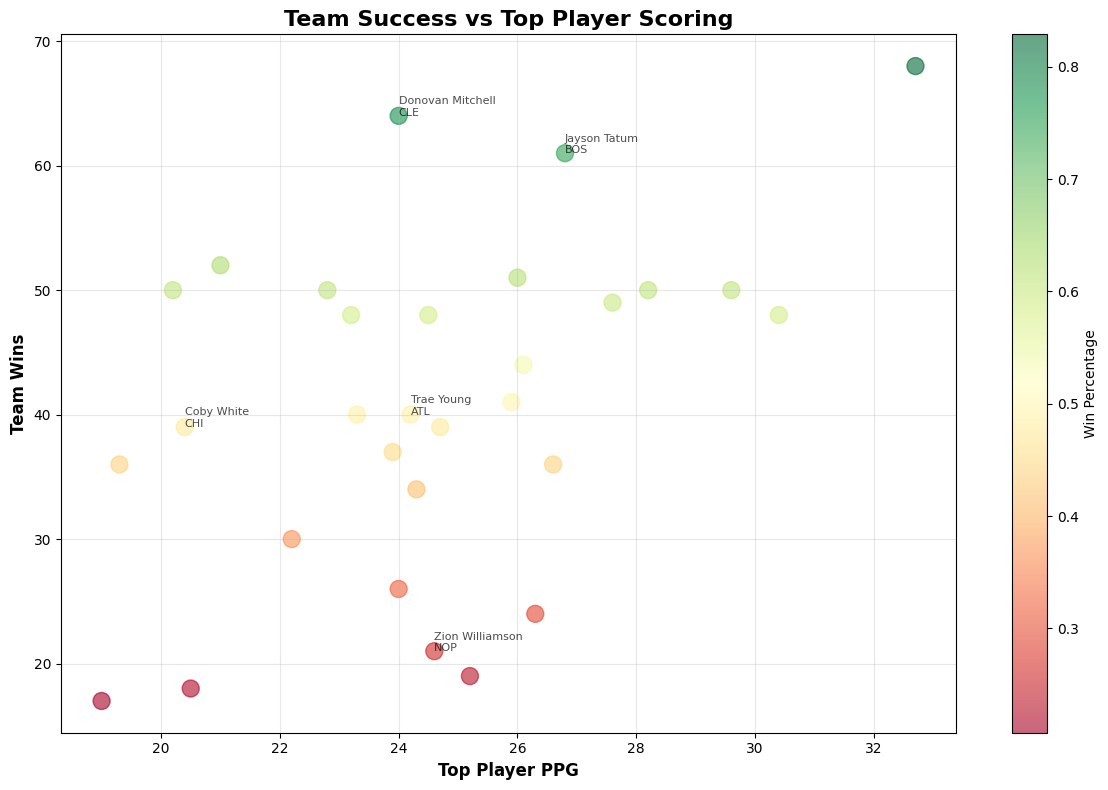


Correlation between top players PPG and team wins: 0.444
523          Trae Young
263        Jayson Tatum
149    Donovan Mitchell
567     Zion Williamson
91           Coby White
Name: PLAYER_NAME, dtype: object


In [30]:
# team success vs top player scoring
plt.figure(figsize = (12,8))

plt.scatter(team_top_players['PTS'], team_top_players['W'],
            alpha = 0.6, s = 150, c = team_top_players['W_PCT'], cmap = 'RdYlGn')

plt.colorbar(label = 'Win Percentage')
plt.xlabel('Top Player PPG', fontsize = 12, fontweight = 'bold')
plt.ylabel('Team Wins', fontsize = 12, fontweight = 'bold')
plt.title('Team Success vs Top Player Scoring', fontsize = 16, fontweight = 'bold')
plt.grid(alpha = 0.3)

# few notable teams
for _, row in team_top_players.head(5).iterrows():
    plt.annotate(f"{row['PLAYER_NAME']}\n{row['TEAM_ABBREVIATION']}",
                 (row['PTS'], row['W']),
                 fontsize = 8, alpha = 0.7)
    
plt.tight_layout()
plt.savefig('../visualizations/team_success_vs_top_player.png', dpi = 300, bbox_inches = 'tight')
plt.show()

# correlation
corr = team_top_players['PTS'].corr(team_top_players['W'])
print(f"\nCorrelation between top players PPG and team wins: {corr:.3f}")
print(team_top_players['PLAYER_NAME'].head(5))


Teams with best depth (balanced minutes):
           TEAM_NAME   AVG_MIN  STD_MIN  WINS  TOTAL_PTS
           Utah Jazz 22.811111 6.261638    17      180.7
   Charlotte Hornets 22.252381 6.547490    19      206.6
       Brooklyn Nets 21.655000 7.260961    26      193.5
  Philadelphia 76ers 22.182609 7.331666    24      231.5
  Washington Wizards 20.552632 7.424836    18      168.5
New Orleans Pelicans 21.928571 7.888482    21      209.1
 Cleveland Cavaliers 19.388889 8.466258    64      166.1
       Atlanta Hawks 20.872222 8.681949    40      174.5
       Orlando Magic 20.418750 8.742099    41      156.7
   Memphis Grizzlies 17.626316 8.759937    48      160.4


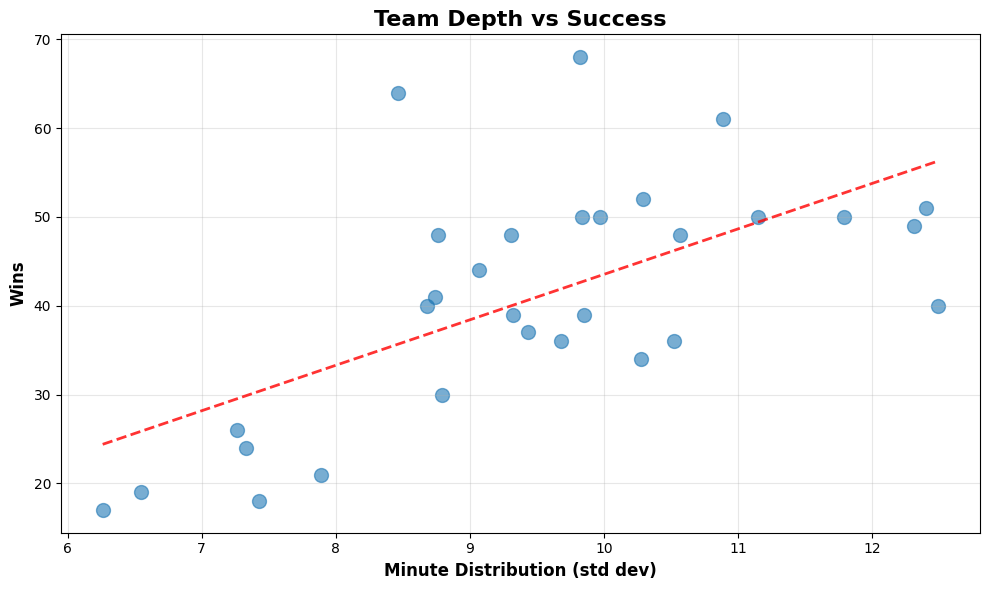

In [19]:
# team depth: standard deviation of minutes
# lower std dev = better depth
team_depth = merged_df.groupby('TEAM_NAME').agg({
    'MIN': ['mean', 'std'],
    'W': 'first',
    'PTS': 'sum'
}).reset_index()

team_depth.columns = ['TEAM_NAME', 'AVG_MIN', 'STD_MIN', 'WINS', 'TOTAL_PTS']
team_depth = team_depth.sort_values('STD_MIN')

print("\nTeams with best depth (balanced minutes):")
print(team_depth.head(10).to_string(index = False))

# visual
plt.figure(figsize = (10, 6))
plt.scatter(team_depth['STD_MIN'], team_depth['WINS'], alpha = 0.6, s = 100)

z = np.polyfit(team_depth['STD_MIN'], team_depth['WINS'], 1)
p = np.poly1d(z)
plt.plot(team_depth['STD_MIN'], p(team_depth['STD_MIN']), "r--", alpha = 0.8, linewidth = 2)

plt.xlabel('Minute Distribution (std dev)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Wins', fontsize = 12, fontweight = 'bold')
plt.title('Team Depth vs Success', fontsize = 16, fontweight = 'bold')
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

In [34]:
merged_df.to_csv('../data/player_team_merged.csv', index = False)